<a href="https://colab.research.google.com/github/Sparks29032/Day-of-Science-2024/blob/main/Day_of_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data from Google Maps

In [ ]:
# Landmarks
names = [
    "National Monument",
    "Lavender Field",
    "Colonel's Row",
    "Ligget Hall",
    "Fort Jay",
    "Fort Jay Theater",
    "St. Cornelius's Chapel",
    "Admiral's House",
    "Governor's House",
    "Building 140",
]

# Distances
D = np.array([
    [0, 1230, 465, 459, 540, 936, 960, 1120, 1173, 1145,],
    [1230, 0, 1647, 1385, 1420, 818, 245, 1028, 1288, 1874,],
    [465, 1647, 0, 441, 756, 1223, 1425, 1530, 1552, 1207,],
    [459, 1385, 441, 0, 978, 814, 1188, 1554, 1634, 1514,],
    [540, 1420, 756, 978, 0, 1418, 1175, 870, 825, 569,],
    [936, 818, 1223, 814, 1418, 0, 762, 1527, 1712, 1993,],
    [960, 245, 1425, 1188, 1175, 762, 0, 856, 1081, 1632,],
    [1120, 1028, 1530, 1554, 870, 1527, 856, 0, 237, 1041,],
    [1173, 1288, 1552, 1634, 825, 1712, 1081, 237, 0, 862,],
    [1145, 1874, 1207, 1514, 569, 1993, 1632, 1041, 862, 0,],
])

# Eigendecomposition of Gram Matrix

In [ ]:
# Gram Matrix
n = len(names)
H = np.identity(n) - (np.zeros((n, n)) + 1/n)
B = -(1/2) * H @ (D**2) @ H

# Compute the eigenvalues and eigenvectors
evalues, evectors = np.linalg.eig(B)

# Get two largest eigenvectors
idx = evalues.argsort()[::-1]
evalues = evalues[idx]
evectors = evectors[:,idx]

# Plotting the Reconstructed Data

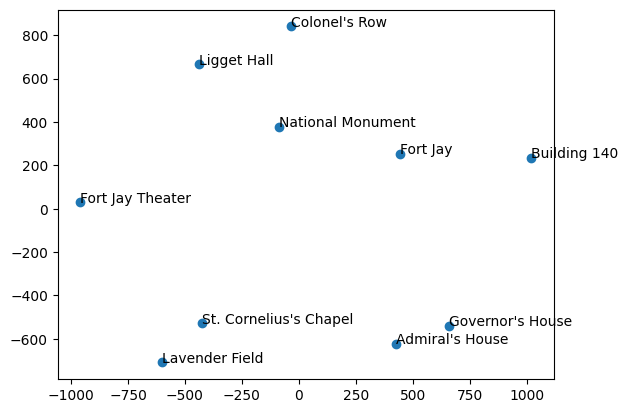

In [ ]:
# Reconstruct the map
x = np.copy(evectors[:,0] * np.sqrt(evalues[0]))
y = np.copy(evectors[:,1] * np.sqrt(evalues[1]))
plt.scatter(x, y)
for i, xy in enumerate(zip(x, y)):
  plt.annotate(names[i], xy=xy, textcoords='data')

# Comparison to Governor's Island Map

The data is first transformed. The optimal transform is computed using least squares regression on the L2 distance (between the PCA fit and target) with Scipy. A map of Governor's island with the relevant landmarks is attached.

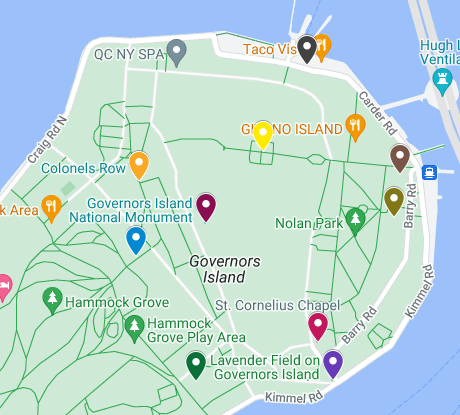

You can drag this image into files to load it automatically (default name `download.png` is used in the following code).

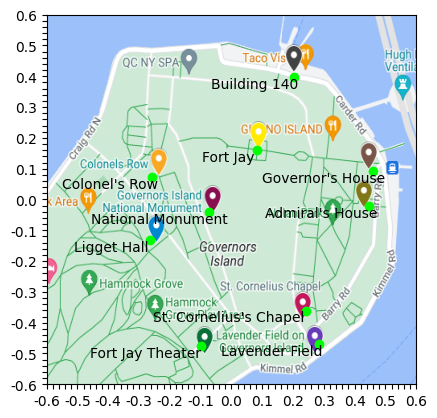

In [ ]:
# Governor's Island Map
import matplotlib.image as mpimg
govis = mpimg.imread("download.png")
sc = 100
sp = 2
pxmin = -60
pxmax = 60
pymin = -60
pymax = 60
plt.imshow(govis, extent=[pxmin/sc, pxmax/sc, pymin/sc, pymax/sc])
plt.xticks([i/100 for i in range(pxmin, pxmax+1, sp)],
 [i / 100 if i % 10 == 0 else None for i in range(pxmin, pxmax+1, sp)])
plt.yticks([i/100 for i in range(pymin, pymax+1, sp)],
 [i / 100 if i % 10 == 0 else None for i in range(pymin, pymax+1, sp)])

# Copy the points
x = np.copy(evectors[:,0] * np.sqrt(evalues[0]))
y = np.copy(evectors[:,1] * np.sqrt(evalues[1]))

# Fit the x coordinates to the rotations and translations
from scipy.optimize import curve_fit
x_target = np.array([-0.062, 0.270, -0.238, -0.242, 0.089,
                     -0.089, 0.232, 0.427, 0.441, 0.200,])
y_target = np.array([-0.040, -0.480, 0.083, -0.133, 0.171,
                     -0.500, -0.380, -0.019, 0.101, 0.420,])

def translate_loss(xy, theta, scale, xt, yt):
  x, y = list(zip(*xy))
  x = np.array(x)
  y = np.array(y)

  # Rotation
  x_new = x * np.cos(theta) - y * np.sin(theta)
  y_new = x * np.sin(theta) + y * np.cos(theta)
  # Scaling
  x_new *= scale
  y_new *= scale
  # Translation
  x_new += xt
  y_new += yt
  return np.sqrt((x_new-x_target)**2 + (y_new-y_target)**2)

def translate(xy, theta=0, scale=1, xt=0, yt=0):
  x, y = list(zip(*xy))
  x = np.array(x)
  y = np.array(y)

  # Rotation
  x_new = x * np.cos(theta) - y * np.sin(theta)
  y_new = x * np.sin(theta) + y * np.cos(theta)
  # Scaling
  x_new *= scale
  y_new *= scale
  # Translation
  x_new += xt
  y_new += yt
  return x_new, y_new

# Plot the data
xy = list(zip(x, y))
popt, pcov = curve_fit(translate_loss, xy, np.zeros(n))
xn, yn = translate(xy, *popt)
plt.scatter(xn, yn, c='lime')
for i, xy in enumerate(zip(xn, yn)):
  x_offset = -len(names[i]) * 5
  y_offset = -8
  plt.annotate(names[i], xy=xy, c='k',
               xytext=(x_offset, y_offset),
               xycoords='data', textcoords='offset points')